#### DecisionTree: 


##### Precision molto buona(0.85), ma Recall più bassa (0.76) -> Meglio della LogisticRegression, ma meno robusta della RandomForest

#### DeepNeuralNetwork: 


##### Precision OTTIMA(0.90), ma Recall bassa (0.72) -> Rischio perdita buoni clienti





#### LogisticRegression: 


##### Precision molto bassa (0.70), ma Recall alta (0.85) -> Rischio di approvare clienti sbagliati

# Valutazioni:

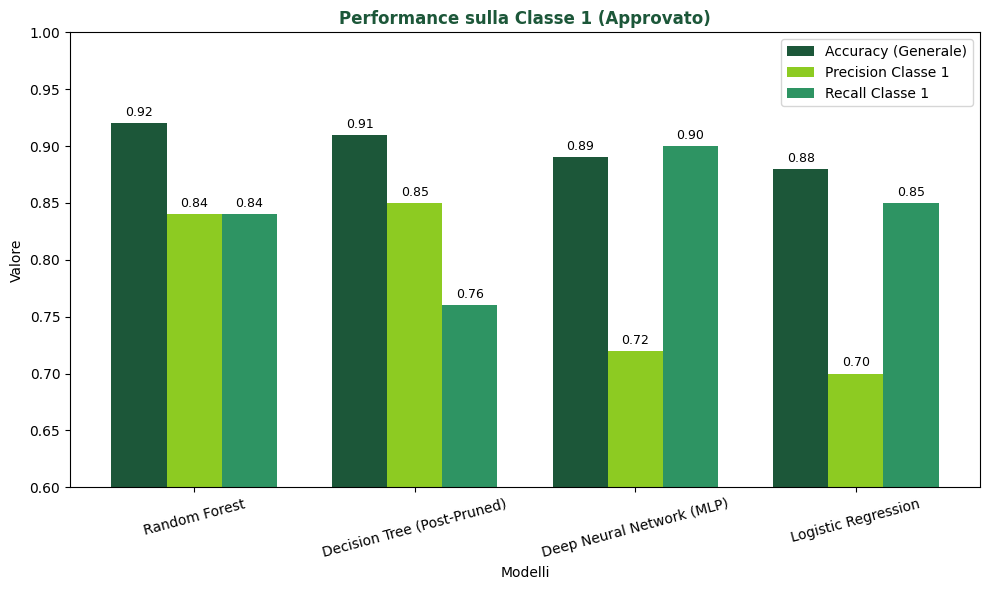

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

# Nomi modelli nel giusto ordine
modelli = ['Random Forest', 'Decision Tree (Post-Pruned)', 'Deep Neural Network (MLP)', 'Logistic Regression']

# Valori da report (classe 1: Approvato / Concesso)
accuracy = [0.92, 0.91, 0.89, 0.88]
precision_1 = [0.84, 0.85, 0.72, 0.70]
recall_1 = [0.84, 0.76, 0.90, 0.85]

# Posizionamento delle barre
index = np.arange(len(modelli))
bar_width = 0.25

# Colori personalizzati
colore_accuracy = '#1c5739'   # Verde scuro
colore_precision = '#8dcb22'  # Verde chiaro
colore_recall = '#2e9463'     # Verde medio

# Creazione grafico
fig, ax = plt.subplots(figsize=(10, 6))

# Aggiunta barre
bars1 = ax.bar(index, accuracy, bar_width, label='Accuracy (Generale)', color=colore_accuracy)
bars2 = ax.bar(index + bar_width, precision_1, bar_width, label='Precision Classe 1', color=colore_precision)
bars3 = ax.bar(index + 2 * bar_width, recall_1, bar_width, label='Recall Classe 1', color=colore_recall)

# Etichette sopra ogni barra
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=9)

# Etichette assi e titolo
ax.set_xlabel('Modelli')
ax.set_ylabel('Valore')
ax.set_title('Performance sulla Classe 1 (Approvato)', color=colore_accuracy, weight='bold')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(modelli, rotation=15)
ax.set_ylim(0.60, 1.00)
ax.legend()

# Rimuovi griglia verticale e orizzontale
ax.grid(False, axis='x')
ax.grid(False, axis='y')

plt.tight_layout()
plt.show()


In [11]:
model_scores = {
    "Random Forest": {"Accuracy": 0.92, "Precision": 0.84, "Recall": 0.84},
    "Decision Tree (Post-Pruned)": {"Accuracy": 0.91, "Precision": 0.85, "Recall": 0.76},
    "Deep Neural Network (MLP)": {"Accuracy": 0.89, "Precision": 0.72, "Recall": 0.90},
    "Logistic Regression": {"Accuracy": 0.88, "Precision": 0.70, "Recall": 0.85}
}

# 2. Converti in DataFrame
df_models = pd.DataFrame(model_scores).T

# 3. Aggiungi colonna con media dei punteggi
df_models["Media"] = df_models[["Accuracy", "Precision", "Recall"]].mean(axis=1)

# 4. Ordina dal più performante al meno
df_sorted = df_models.sort_values(by="Media", ascending=False)

# 5. Mostra il ranking
print("Classifica dei Modelli dal più performante al meno:")
print(df_sorted[["Accuracy", "Precision", "Recall", "Media"]])

Classifica dei Modelli dal più performante al meno:
                             Accuracy  Precision  Recall     Media
Random Forest                    0.92       0.84    0.84  0.866667
Decision Tree (Post-Pruned)      0.91       0.85    0.76  0.840000
Deep Neural Network (MLP)        0.89       0.72    0.90  0.836667
Logistic Regression              0.88       0.70    0.85  0.810000


In [ ]:
# Vincitore: RANDOM FOREST!
# Offre il miglior BILANCIAMENTO tra Accuracy, Recall(1), Precision
# Risultando il più adatto per decisioni bancarie affidabili